# NLP - Text Analytics: Food Recalls!
--------------------------------

Can you predict the 'severity' (CLASS 1, 2, 3) as a function of the `Product Description` and the `Reason for Recall`? Be careful - there is imbalanced data which may require some advanced methods in order to get a reasonable model. Can you beat a naive (majority class) model?

# Data
* Raw data was download from this website:
  * https://datadashboard.fda.gov/ora/cd/recalls.htm


In [ ]:
!gdown 1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb

Downloading...
From: https://drive.google.com/uc?id=1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb
To: /content/6e2834d6-96ff-4d56-b01f-5f343e65e516.xlsx
100% 15.3M/15.3M [00:00<00:00, 42.6MB/s]


In [ ]:
import pandas as pd
df = pd.read_excel('/content/6e2834d6-96ff-4d56-b01f-5f343e65e516.xlsx')

In [ ]:
print(df.shape)
df.head()

(82885, 17)


,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
0,3012323885,Global Pharma Healthcare Private Limited,Drugs,Class I,Ongoing,"Product was imported by one distributor, Delsa...",Chennai,-,India,2023-03-30,Non-Sterility: FDA analysis found unopened tub...,Delsam Pharma's Artificial Eye Ointment (Miner...,91768,Class I,198822,CDER,https://www.accessdata.fda.gov/scripts/ires/?P...
1,3021369817,THE ISH COMPANY,Food/Cosmetics,Class I,Ongoing,"AR, AZ, CA, CO, CT, DC, DE, FL, GA, ID, IL, KS...",Greenville,Delaware,United States,2023-03-27,undeclared soy proteins,ISH Shrimpish Sample Meal Kit: ( Sample Meal K...,91485,Class I,198005,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
2,3015428950,LLK TRADING INC,Food/Cosmetics,Class I,Ongoing,The product was distributed to one firm in New...,Linden,New Jersey,United States,2023-03-24,"Xin Ao International Group Corp, 601 E. Linden...",SSS brand and K-Fresh branded Enoki Mushrooms\...,91721,Class I,198717,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
3,3013857925,DAISO CALIFORNIA WAREHOUSE,Food/Cosmetics,Class I,Ongoing,"California, Washington, Nevada, Texas, New Yor...",La Mirada,California,United States,2023-03-17,The allergen of milk was not declared on the l...,MEITO Lemon Tea \n4 Pack\nUPC: 4902757413507\n...,91699,Class I,198595,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
4,3013857925,DAISO CALIFORNIA WAREHOUSE,Food/Cosmetics,Class I,Ongoing,"California, Washington, Nevada, Texas, New Yor...",La Mirada,California,United States,2023-03-17,The allergen of cashew and almond was not decl...,Fuyouyakuhin Fruitsaojiru \n3g -3 Pack\nUPC: 4...,91699,Class I,198596,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...


In [ ]:
# drop duplicative product descriptions
print(df.shape)
df.drop_duplicates(subset='Product Description',inplace=True)
print(df.shape)

(82885, 17)
(71906, 17)


# 1. Exploratory Data Analysis

## First prepare/clean data for analysis

In [ ]:
df['input'] = df['Product Description']+' '+df['Reason for Recall']

In [ ]:
df['input']

0        Delsam Pharma's Artificial Eye Ointment (Miner...
1        ISH Shrimpish Sample Meal Kit: ( Sample Meal K...
2        SSS brand and K-Fresh branded Enoki Mushrooms\...
3        MEITO Lemon Tea \n4 Pack\nUPC: 4902757413507\n...
4        Fuyouyakuhin Fruitsaojiru \n3g -3 Pack\nUPC: 4...
                               ...                        
82871    Napoleon canned, Smoked Oysters, Medium.  Item...
82872    Napoleon canned, Smoked Oysters, Large.  Item ...
82873    Campbell's Oyster Stew, Net Wt 10.5 oz (298g),...
82876    Bliss Bros. Dairy Chocolate Peanut Butter Cook...
82877    Newport Creamery Chocolate Peanut Butter Froze...
Name: input, Length: 71906, dtype: object

Let us make everything lowercase:

In [ ]:
df['input'] = df['input'].str.lower()

Let's clean the text from funky characters and newlines.

In [ ]:
# remove \n, filter to letters, remove funky characters
df['input'] = df['input'].str.replace('\n', '').str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()

<ipython-input-8-82f1dd889e65>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['input'] = df['input'].str.replace('\n', '').str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()


In [ ]:
df['input'].head()

0    delsam pharmas artificial eye ointment mineral...
1    ish shrimpish sample meal kit sample meal kit ...
2    sss brand and kfresh branded enoki mushroomspa...
3    meito lemon tea packupc made in japan the alle...
4    fuyouyakuhin fruitsaojiru g packupc made in ja...
Name: input, dtype: object

Let's lemmatize and take care of stop words!!

In [ ]:
import nltk
from nltk.corpus import stopwords

# download stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

# remove the words
df["input"] = df['input'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['input']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        delsam pharmas artificial eye ointment mineral...
1        ish shrimpish sample meal kit sample meal kit ...
2        sss brand kfresh branded enoki mushroomspackag...
3        meito lemon tea packupc made japan allergen mi...
4        fuyouyakuhin fruitsaojiru g packupc made japan...
                               ...                        
82871    napoleon canned smoked oysters medium item net...
82872    napoleon canned smoked oysters large item net ...
82873    campbells oyster stew net wt oz g campbell sou...
82876    bliss bros dairy chocolate peanut butter cooki...
82877    newport creamery chocolate peanut butter froze...
Name: input, Length: 71906, dtype: object

In [ ]:
# download wordnet
nltk.download('wordnet')

# import lemmatizer
from nltk.stem import WordNetLemmatizer

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# lemmatize all of input
df['input'] = df['input'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df['input']

[nltk_data] Downloading package wordnet to /root/nltk_data...


0        delsam pharma artificial eye ointment mineral ...
1        ish shrimpish sample meal kit sample meal kit ...
2        ss brand kfresh branded enoki mushroomspackage...
3        meito lemon tea packupc made japan allergen mi...
4        fuyouyakuhin fruitsaojiru g packupc made japan...
                               ...                        
82871    napoleon canned smoked oyster medium item net ...
82872    napoleon canned smoked oyster large item net w...
82873    campbell oyster stew net wt oz g campbell soup...
82876    bliss bros dairy chocolate peanut butter cooki...
82877    newport creamery chocolate peanut butter froze...
Name: input, Length: 71906, dtype: object

## Analyze and Visualize Words

### Word Frequency Line Chart

In [ ]:
# split words from column into count of each word
words = df['input'].str.split(expand=True).stack().value_counts()
words[0:20] # top 20 words!

product      42421
may          21439
oz           20245
system       18199
ml           16456
upc          14853
use          12916
inc          11806
number       11644
potential    11637
ndc          10740
used         10677
due          10631
mm           10605
rx           10460
device       10392
mg           10239
patient      10181
sterility     9957
lb            9914
dtype: int64

In [ ]:
# convert this to a dataframe
words = pd.DataFrame(words)

words.reset_index(inplace=True)

words.rename(columns={words.columns[0]:'word', words.columns[1]:'frequency'}, inplace=True)
words.head()

,word,frequency
0,product,42421
1,may,21439
2,oz,20245
3,system,18199
4,ml,16456


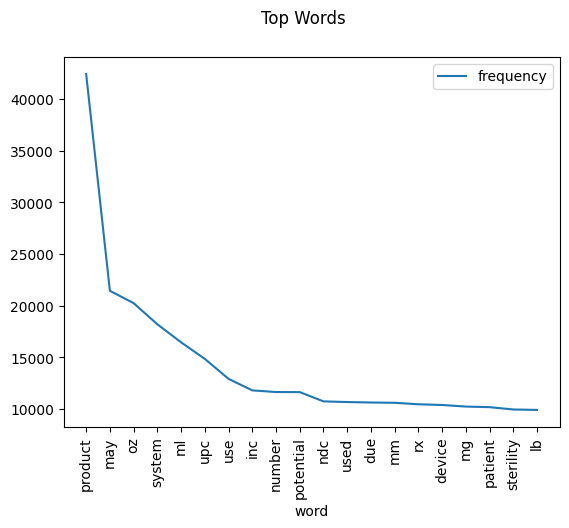

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

words = words[0:20]
words.plot(x='word', y='frequency')
plt.xticks(np.arange(len(words)), words['word'], rotation=90)
plt.suptitle('Top Words')
plt.show()

As you can see above, obviously 'product' is the most used word throughout the dataset. You can also see how a lot of measurements are very frequent.

### Top Words WordCloud

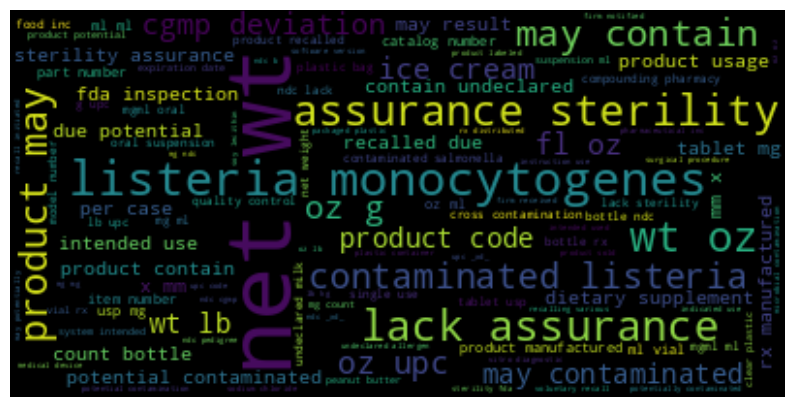

In [ ]:
from wordcloud import WordCloud
# Import WordCloud

wordcloud = WordCloud().generate(' '.join(df['input'])) # build off of input column

# Plot the wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a better visualization than the top 20 words line chart because we can see more variation and words in general, in addition to bigrams. For example, we can see "net wt" and "cgmp deviation". We can clearly see the reasons for recall, as well, such as things to do with sterility, contamination, and listeria. In addition, we can even see what a lot of the products are, such as ice cream and dietary supplement.

### Top Words per Claim Severity

In [ ]:
class_1 = df['input'][df['Product Classification'] == 'Class I'].str.split(expand=True).stack().value_counts()
class_2 = df['input'][df['Product Classification'] == 'Class II'].str.split(expand=True).stack().value_counts()
class_3 = df['input'][df['Product Classification'] == 'Class III'].str.split(expand=True).stack().value_counts()

In [ ]:
class_1 = pd.DataFrame(class_1)
class_1.reset_index(inplace=True)
class_1.rename(columns={class_1.columns[0]:'word', class_1.columns[1]:'frequency'}, inplace=True)

class_2 = pd.DataFrame(class_2)
class_2.reset_index(inplace=True)
class_2.rename(columns={class_2.columns[0]:'word', class_2.columns[1]:'frequency'}, inplace=True)

class_3 = pd.DataFrame(class_3)
class_3.reset_index(inplace=True)
class_3.rename(columns={class_3.columns[0]:'word', class_3.columns[1]:'frequency'}, inplace=True)

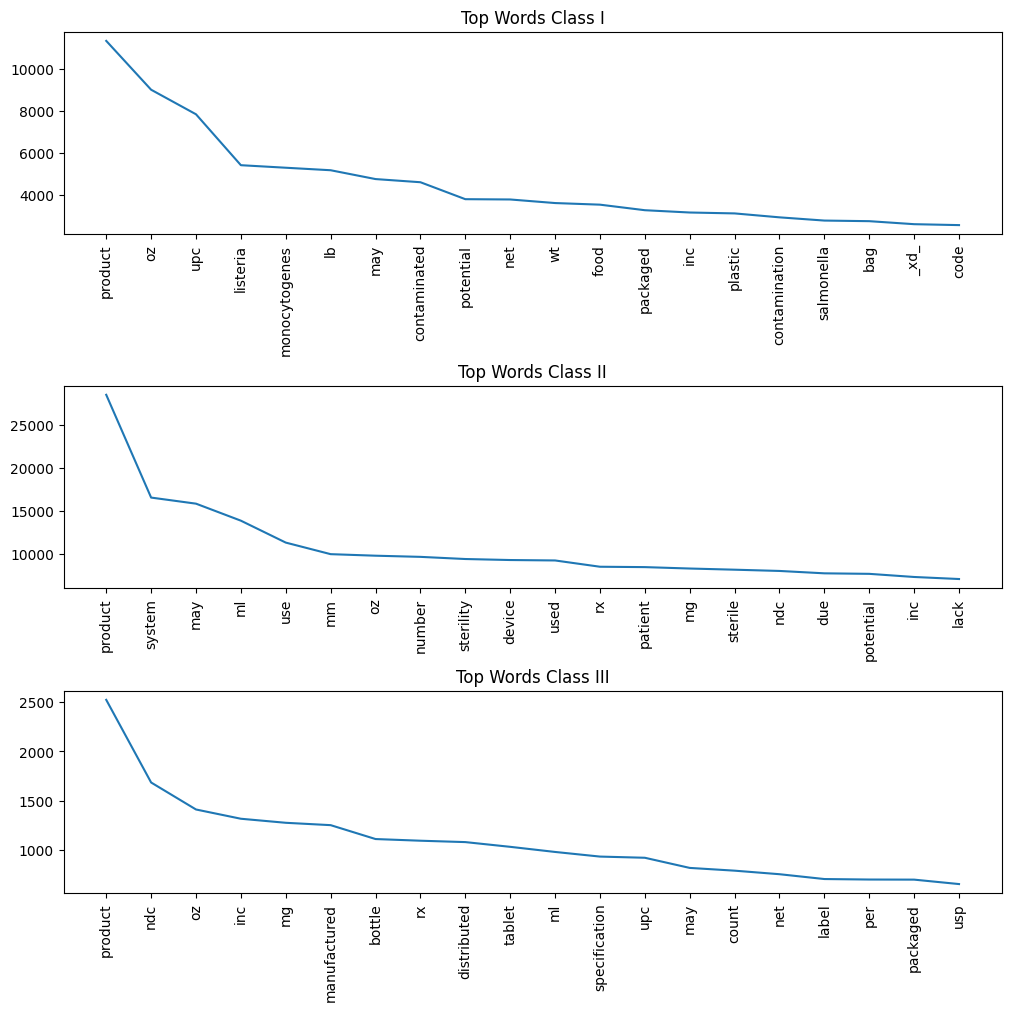

In [ ]:
# create three rows of subplots
fig, ax = plt.subplots(3, 1, # three rows, one column
                       constrained_layout = True, # this automaticvally sets spacing between subplots
                       figsize = (10,10)) # increases size of figure (the whole plot)

# plot each like done previously, per individual subplot (ax[0], ax[1], ax[2])
class_1 = class_1[0:20]
ax[0].plot(class_1['word'], class_1['frequency'])
ax[0].set_xticks(np.arange(len(class_1)), class_1['word'], rotation=90)
ax[0].set_title('Top Words Class I')

class_2 = class_2[0:20]
ax[1].plot(class_2['word'], class_2['frequency'])
ax[1].set_xticks(np.arange(len(class_2)), class_2['word'], rotation=90)
ax[1].set_title('Top Words Class II')

class_3 = class_3[0:20]
ax[2].plot(class_3['word'], class_3['frequency'])
ax[2].set_xticks(np.arange(len(class_3)), class_3['word'], rotation=90)
ax[2].set_title('Top Words Class III')

fig.show()

Above, we see the frequency of words per class. This is important so we can see differentiating factors in recalls per class. One thing we see is that Class III is that there are no "alarming" words of high frequency. Meanwhile, as we go down classes, we can see more frequent "alarming"  words, such as "sterility", "monocytogenes", "contaminated" and "salmonella".

### Wordcloud from the top 500 least Polarizing (most negative) Reasons for Recall

In [ ]:
# import textblob library for polarity function
from textblob import TextBlob

df['polarity'] = df['input'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Let's see the input with the lowest polarity, with the reason for recall as text!

print("3 Reasons for Recall with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['Reason for Recall']):
  print('Reason for Recall {}:\n'.format(index+1),review)

3 Reasons for Recall with Lowest Polarity:
Reason for Recall 1:
 Garden-Fresh Foods is recalling various cut vegetables,  ready-to-eat salads, slaw, spread and dip products sold under various brands and code dates manufactured prior to November 06, 2013  because they may be contaminated with Listeria monocytogenes.
Reason for Recall 2:
 Siemens Healthcare Diagnostics has become aware of N-Acetylcysteine (NAC) and Metamizole (Dipyrone) interference with Trinder and Trinder-like reaction assays.  Siemens has confirmed that falsely depressed results may occur on samples drawn from patients receiving N-Acetylcysteine (NAC) or Metamizole.  NAC is the accepted antidote for acetaminophen toxicity and is justified in patients at signific
Reason for Recall 3:
 Product recalled due to potentially elevated levels of Histamines. Product supplier, TPX, is recalling product which is related to a recent scombrotoxin poisoning outbreak in US.


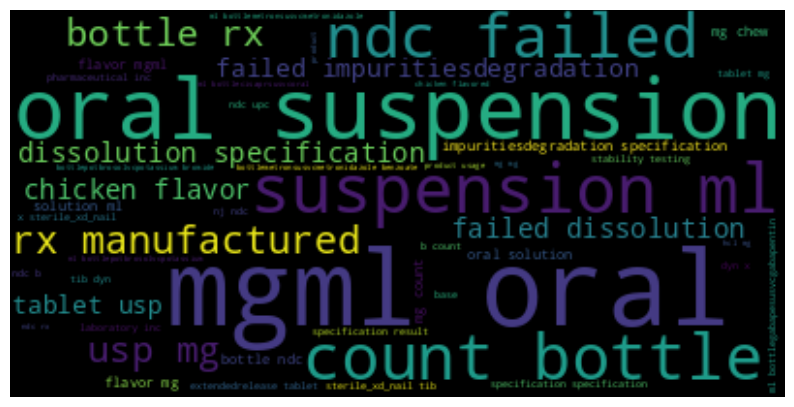

In [ ]:
# Let us make a wordcloud of the top 100 most polarizing reasons for recall, but using the input column so the wordcloud is more clean

most_polarity=pd.DataFrame(df.sort_values(by = 'polarity', ascending=True)[:1000])

wordcloud = WordCloud().generate(' '.join(most_polarity['input'])) # build off of input column

# Plot the wordcloud
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As you can see, the polarity was greatly influenced in these by words like "suspension", "failed", and "dissolution".

# 2. Prepare Data for Modeling


## create a new dataset

In [ ]:
df_final = df.loc[:,['input','Product Classification']]

In [ ]:
df_final.head(2)

,input,Product Classification
0,delsam pharma artificial eye ointment mineral ...,Class I
1,ish shrimpish sample meal kit sample meal kit ...,Class I


## check y distribution

In [ ]:
X = df_final['input']
y = df_final['Product Classification']

In [ ]:
y.value_counts()

Class II     52221
Class I      15301
Class III     4384
Name: Product Classification, dtype: int64

## handle with imbalanced distribution

In [ ]:
# stratify split data in 70/30, keep 30% as test data and we will apply some sample techs on training data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_final, test_size=0.1, stratify=y)

In [ ]:
df_train['Product Classification'].value_counts()

Class II     46999
Class I      13771
Class III     3945
Name: Product Classification, dtype: int64

In [ ]:
df_test['Product Classification'].value_counts()

Class II     5222
Class I      1530
Class III     439
Name: Product Classification, dtype: int64

In [ ]:
# apply sample technique on df_train
## undersample Class II
df_c2 = df_train[df_train['Product Classification']=='Class II']
df_c2_resample = df_c2.sample(n=25000, replace = False, random_state =1)

## keep Class I unchanged
df_c1 = df_train[df_train['Product Classification']=='Class I']
df_c1_resample = df_c1.sample(n=15000, replace = True, random_state =1)

## upsample Class III
df_c3 = df_train[df_train['Product Classification']=='Class III']
df_c3_resample = df_c3.sample(n=10000, replace = True, random_state =1)

In [ ]:
df_final_new = pd.concat([df_c2_resample,df_c1_resample,df_c3_resample,df_test])
df_final_new.shape

(57191, 2)

In [ ]:
X = df_final_new['input']
y = df_final_new['Product Classification']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

lb = LabelEncoder()
y = lb.fit_transform(y)
y = keras.utils.to_categorical(y)
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
lb_name_mapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print(lb_name_mapping)

{'Class I': 0, 'Class II': 1, 'Class III': 2}


## TF-IDF for DNNs

In [ ]:
# Import tokenizer
from keras.preprocessing.text import Tokenizer

# I want 10000 words to be tokenized
t = Tokenizer(num_words = 10000)

# fit onto df input
t.fit_on_texts(df_final_new['input'])

# Printing leads to an error in the notebook which restricts large amounts of data to be displayed,
# so we won't be doing this
# print(t.word_counts)
# print(t.document_count)
# print(t.word_index)
# print(t.word_docs)

Next, our input data will be converted into a TF-IDF matrix. We are using this mode instead of frequency, for example, because there are many words that are very frequent across all classes that are not very important. Details about the product's weight, for example, are extremely prevalent. So we are using this mode with the assumption that the words that will differentiate the classes will be neither too common nor too uncommon.

In [ ]:
# Now make X into a TF-IDF matrix
X_tfidf= t.texts_to_matrix(df_final_new['input'], mode = 'tfidf')

### PCA Visualization

We will be using PCA as the final visualization in order to visually see how distinctly separated each class's text data is (this is obviously dependent on our tokenization process).

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# initialize PCA instance
pca = PCA(n_components=50)

# fit to data
pca_result = pca.fit_transform(X_tfidf)

# extract only three columns (three with the top most explained variance)
tmp = pd.DataFrame(columns=['pca-one', 'pca-two', 'pca-three'])
tmp['pca-one'] = pca_result[:,0]
tmp['pca-two'] = pca_result[:,1]
tmp['pca-three'] = pca_result[:,2]

# Let's see the explained variance per column
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
tmp.head()

Explained variation per principal component: [0.00955848 0.00784308 0.00705569 0.00495051 0.00466129 0.00457435
 0.00433184 0.00412983 0.00401192 0.00371968 0.00361044 0.00346903
 0.00336422 0.00315557 0.00310306 0.00304958 0.00291096 0.00289854
 0.00283162 0.00277758 0.00264411 0.00254351 0.00246317 0.00234382
 0.00229984 0.0022549  0.00222469 0.00220693 0.00216961 0.00213744
 0.00208314 0.00205281 0.0020119  0.0019423  0.00192108 0.001897
 0.00184306 0.00182539 0.00178912 0.00177535 0.00173573 0.00168322
 0.00167384 0.00165379 0.00162028 0.00160295 0.00160118 0.00156269
 0.00155714 0.00155137]


,pca-one,pca-two,pca-three
0,2.624491,-2.216589,0.724048
1,2.387521,-0.073512,0.430135
2,2.792763,-2.639050,1.089859
3,-0.377698,1.319947,0.736169
4,3.502762,-1.641640,1.405853


<Axes: xlabel='pca-one', ylabel='pca-two'>

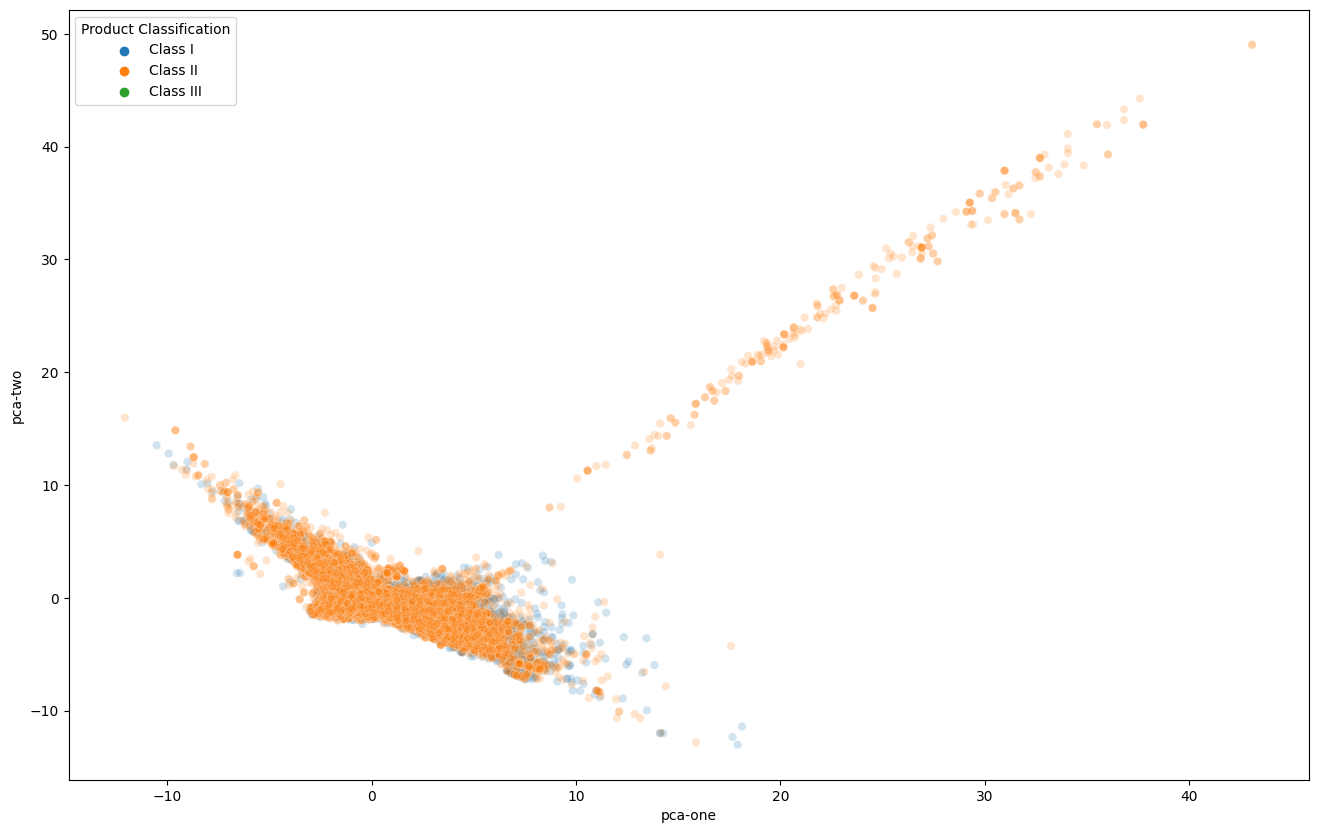

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(x=tmp["pca-one"],
            y=tmp["pca-two"],
    hue=df['Product Classification'],
    data=tmp,
    legend="full",
    alpha=0.2
)

As seen above, the classes intersect a lot in terms of text. Class II and III seem to have the most similarities, while a good lot of Class I seems to stray away a bit, as seen in the second quantile of the plot. Nonetheless, it is very possible that they have third or fourth-dimensional variation.

## RNN Data （for RNN model_1)

In [ ]:
# import sequence padder
from keras.utils import pad_sequences

# tokenizer was already fit onto the column
X_rnn = t.texts_to_sequences(df_final_new['input'])

# pad sequences;
# this was experimented with immensely in order to get better performance than the DNN model
# capture sufficient enough info while keeping the model less time and energy consuming.
maxlen = int((df_final_new['input'].str.len()).quantile(0.7))
data = pad_sequences(X_rnn, maxlen=maxlen)

# convert y to nparray
y = np.asarray(y)

## Train Test Split

In [ ]:
# First for y. They should be the same for each corresponding X

y_train = y[:df_final_new.shape[0]-df_test.shape[0]]
y_test = y[df_final_new.shape[0]-df_test.shape[0]:]

In [ ]:
# Splits for RNN and DNN

# RNN X Train Test
X_rnn_train = data[:df_final_new.shape[0]-df_test.shape[0]]
X_rnn_test = data[df_final_new.shape[0]-df_test.shape[0]:]

# TFIDF Train Test
X_tfidf_train = X_tfidf[:df_final_new.shape[0]-df_test.shape[0]]
X_tfidf_test = X_tfidf[df_final_new.shape[0]-df_test.shape[0]:]

# Modeling and Evaluation

## Baseline Model

In [ ]:
print('baseline model accuracy:',df_final[df_final['Product Classification']=='Class II'].shape[0]/df_final.shape[0])

baseline model accuracy: 0.7262398130893111


## DNN (TFIDF)

In [ ]:
# check shape
print(X_tfidf.shape) # original TFIDF
print(X_tfidf_train.shape, y_train.shape)
print(X_tfidf_test.shape, y_test.shape)

(57191, 10000)
(50000, 10000) (50000, 3)
(7191, 10000) (7191, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
n_outputs = y.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_tfidf_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000100   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,005,303
Trainable params: 1,005,303
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=5,
                   restore_best_weights = True)

history = model.fit(X_tfidf_train, y_train,
                    callbacks = [es],
                    epochs=5000,
                    batch_size=128,
                    validation_data=(X_tfidf_test, y_test))

Epoch 1/5000
391/391 [==============================] - 14s 34ms/step - loss: 0.4747 - accuracy: 0.8172 - val_loss: 0.2415 - val_accuracy: 0.9111
Epoch 2/5000
391/391 [==============================] - 12s 29ms/step - loss: 0.2127 - accuracy: 0.9274 - val_loss: 0.2198 - val_accuracy: 0.9245
Epoch 3/5000
391/391 [==============================] - 11s 29ms/step - loss: 0.1382 - accuracy: 0.9544 - val_loss: 0.2354 - val_accuracy: 0.9267
Epoch 4/5000
391/391 [==============================] - 13s 32ms/step - loss: 0.1013 - accuracy: 0.9679 - val_loss: 0.2508 - val_accuracy: 0.9316
Epoch 5/5000
391/391 [==============================] - 11s 28ms/step - loss: 0.0813 - accuracy: 0.9739 - val_loss: 0.2804 - val_accuracy: 0.9262
Epoch 6/5000
391/391 [==============================] - 11s 27ms/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.2951 - val_accuracy: 0.9284
Epoch 7/5000
391/391 [==============================] - 12s 30ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.3021 -

In [ ]:
# stealing this from our other scripts
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

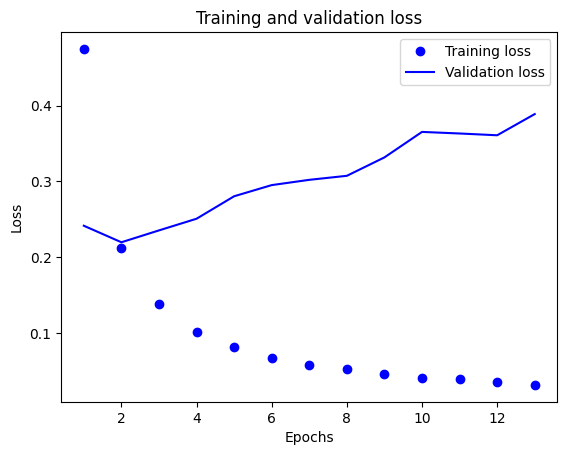

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

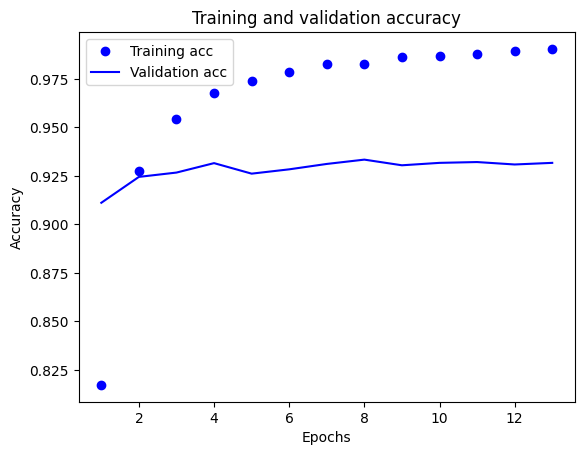

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



*   We can see training loss and accuracy increase during fitting process, which may be caused by overfitting.



In [ ]:
# classification report and confusion matrix
from sklearn.metrics import confusion_matrix

# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model.predict(X_tfidf_test),0)
preds[0]


225/225 [==============================] - 2s 7ms/step


array([0., 1., 0.], dtype=float32)

In [ ]:
# confusion matrix (tough to see... but most is on diagonal!)
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
matrix

# look at documentation for conf matrix on sklearn if you have questions!

array([[1401,  119,   10],
       [ 152, 4979,   91],
       [  12,  101,  326]])

In [ ]:
# classification report (similar - need argmax!)
from sklearn.metrics import classification_report

# more detail on how well things were predicted
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1530
           1       0.96      0.95      0.96      5222
           2       0.76      0.74      0.75       439

    accuracy                           0.93      7191
   macro avg       0.87      0.87      0.87      7191
weighted avg       0.93      0.93      0.93      7191







*   The f1 score of Class I and Class II is close to each other, but that of Class III is low. This is because the distribution of data is unbalanced, and there is less Class III data available for model learning. We used sample technology to increase the proportion of Class III data, and the f1 score also increased from ~0.35 to 0.67.



## RNN_1

In [ ]:
print(data.shape)
print(X_rnn_train.shape, y_train.shape)
print(X_rnn_test.shape, y_test.shape)

(57191, 300)
(50000, 300) (50000, 3)
(7191, 300) (7191, 3)


In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU
from keras.layers import LSTM, Dropout
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

max_features = 10000  # number of words to consider as features

# define model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(2))
model.add(LSTM(60, return_sequences=True,activation='relu',recurrent_dropout=0.2))
model.add(GRU(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_outputs, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 64)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 149, 60)           30000     
                                                                 
 gru (GRU)                   (None, 30)                8280      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                      

In [ ]:
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=5,
                   restore_best_weights = True)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_rnn_train, y_train,
                    callbacks = [es],
                    epochs=5000,
                    batch_size=128,
                    validation_data=(X_rnn_test, y_test))

Epoch 1/5000
391/391 [==============================] - 282s 709ms/step - loss: 124334208.0000 - accuracy: 0.7120 - val_loss: 0.4578 - val_accuracy: 0.8639
Epoch 2/5000
391/391 [==============================] - 277s 709ms/step - loss: 5.4759 - accuracy: 0.8787 - val_loss: 0.3072 - val_accuracy: 0.8939
Epoch 3/5000
391/391 [==============================] - 279s 713ms/step - loss: 0.3134 - accuracy: 0.9215 - val_loss: 0.2645 - val_accuracy: 0.9100
Epoch 4/5000
391/391 [==============================] - 276s 706ms/step - loss: 0.2670 - accuracy: 0.9484 - val_loss: 0.2697 - val_accuracy: 0.9125
Epoch 5/5000
391/391 [==============================] - 277s 708ms/step - loss: 1.7620 - accuracy: 0.9623 - val_loss: 0.2687 - val_accuracy: 0.9173
Epoch 6/5000
391/391 [==============================] - 276s 707ms/step - loss: 1.4243 - accuracy: 0.9718 - val_loss: 0.2772 - val_accuracy: 0.9189
Epoch 7/5000
391/391 [==============================] - 277s 710ms/step - loss: 3.9358 - accuracy: 0.977

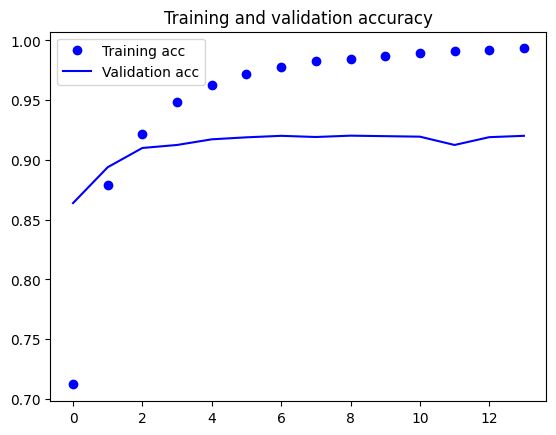

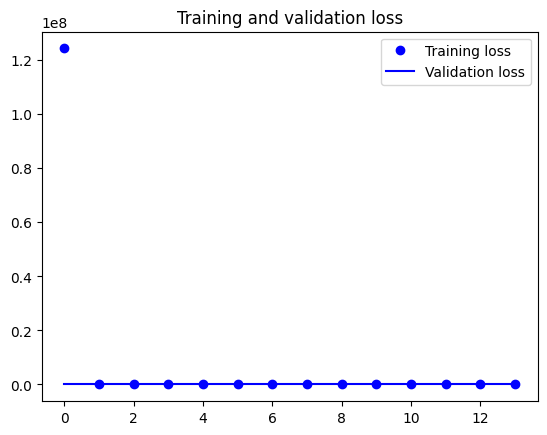

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
preds_rnn = np.round(model.predict(X_rnn_test),0)
preds[0]


225/225 [==============================] - 15s 63ms/step


array([0., 1., 0.], dtype=float32)

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds_rnn.argmax(axis=1))
matrix

array([[1362,  152,   16],
       [ 170, 4949,  103],
       [  14,  122,  303]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(y_test.argmax(axis=1), preds_rnn.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1530
           1       0.95      0.95      0.95      5222
           2       0.72      0.69      0.70       439

    accuracy                           0.92      7191
   macro avg       0.85      0.84      0.85      7191
weighted avg       0.92      0.92      0.92      7191



##RNN_2 (pre_trained embedding)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load pre-trained GloVe embeddings
def load_glove_embeddings(filepath):
    word_embeddings = {}
    with open(filepath, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            word_embeddings[word] = coefs
    return word_embeddings

glove_file = '/content/drive/MyDrive/OPIM 5509- Deep Learning/Module 5: Recurrent Neural Networks for Text Sequences  /Module 5.2 - Implementation and Advanced Topics  /glove.6B/glove.6B.100d.txt'
word_embeddings = load_glove_embeddings(glove_file)

In [ ]:
# Load and preprocess the dataset
X = df_final_new['input'].values

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
maxlen = int((df_final_new['input'].str.len()).quantile(0.8))
X = pad_sequences(X, maxlen=maxlen)

# Split the dataset into training and testing sets
# RNN X Train Test
X_rnn2_train =X[:df_final_new.shape[0]-df_test.shape[0]]
X_rnn2_test = X[df_final_new.shape[0]-df_test.shape[0]:]
y_rnn2_train = y[:df_final_new.shape[0]-df_test.shape[0]]
y_rnn2_test = y[df_final_new.shape[0]-df_test.shape[0]:]

In [ ]:
vocab_size = 100000 # size of the vocabulary in the model
embedding_dim = 100 # dimension of each word embedding
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill the embedding matrix with the pre-trained embeddings for words in your vocabulary
for word, i in tokenizer.word_index.items():
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# Use pre-trained GloVe embeddings in a machine learning model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_rnn2_train, y_rnn2_train,
                    callbacks = [es],
                    epochs=5000,
                    batch_size=128,
                    validation_data=(X_rnn2_test, y_rnn2_test))

Epoch 1/5000
391/391 [==============================] - 394s 1s/step - loss: 0.5942 - accuracy: 0.7537 - val_loss: 0.3939 - val_accuracy: 0.8437
Epoch 2/5000
391/391 [==============================] - 415s 1s/step - loss: 0.3905 - accuracy: 0.8498 - val_loss: 0.3161 - val_accuracy: 0.8819
Epoch 3/5000
391/391 [==============================] - 395s 1s/step - loss: 0.3029 - accuracy: 0.8841 - val_loss: 0.2901 - val_accuracy: 0.8950
Epoch 4/5000
391/391 [==============================] - 389s 997ms/step - loss: 0.2409 - accuracy: 0.9119 - val_loss: 0.2812 - val_accuracy: 0.9007
Epoch 5/5000
391/391 [==============================] - 409s 1s/step - loss: 0.1996 - accuracy: 0.9274 - val_loss: 0.2835 - val_accuracy: 0.8981
Epoch 6/5000
391/391 [==============================] - 390s 997ms/step - loss: 0.1678 - accuracy: 0.9404 - val_loss: 0.2839 - val_accuracy: 0.9027
Epoch 7/5000
391/391 [==============================] - 409s 1s/step - loss: 0.1323 - accuracy: 0.9534 - val_loss: 0.2858 - 

In [ ]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds_rnn2 = np.round(model.predict(X_rnn2_test),0)
preds[0]

225/225 [==============================] - 22s 98ms/step


array([0., 1., 0.], dtype=float32)

In [ ]:
# classification report and confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_rnn2_test.argmax(axis=1), preds_rnn2.argmax(axis=1))
matrix


array([[1355,  157,   18],
       [ 159, 4921,  142],
       [  13,  107,  319]])

In [ ]:
# classification report (similar - need argmax!)
from sklearn.metrics import classification_report

# more detail on how well things were predicted
print(classification_report(y_rnn2_test.argmax(axis=1), preds_rnn2.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1530
           1       0.95      0.94      0.95      5222
           2       0.67      0.73      0.69       439

    accuracy                           0.92      7191
   macro avg       0.83      0.85      0.84      7191
weighted avg       0.92      0.92      0.92      7191



# 5. Discussion



*   An important part of this modeling process was implementing knowledge from our data mining class, within which we discussed NLP theory. This allowed our DNN model to be successful because we understood the appropriate way to prepare our data for modeling.
*   Referring to the previous bullet, the best way to prepare text data for this kind of model, at least in theory, is through TF-IDF. TF-IDF basically emphasizes the words that are neither most frequent nor least frequent. In theory, these are the words that provide the most distinction between classes.
*   With all this being said, we can move on to the RNN model. This model performed worse than we thought it would, despite cleaning up the data as much as possible. Whether this was due to the DNN's performance being much better due to using TF-IDF rather than frequency, we are not very sure.
*   Even when using GloVe, a pre-trained word embedding, the performance would not improve beyond that of the DNN's. We suspect it may be because the structure of the text we are fitting on is different from the ordinary.
*   One this that did prove successful for the RNN model though is adjusting the padding of sequences. When fitting onto the data where padding was the mean length of all text data, performance was ~0.85 F1 score. However, after consulting with the internet about what an appropriate padding length is, we settled on it being between the 60% and 75% quantile of all of the text data's lengths. This increased performance by quite a bit, to around 0.92 F1 score, which got us closer to the DNN's performance.
